# Lidiar con los valores perdidos

Como se muestra en la siguiente lista, existen cuatro enfoques diferentes para tratar los va faltantes:

* Manténgalos como están.

* limine los objetos de datos (filas) con valores faltantes.

* Elimine los atributos (columnas) con valores faltantes.

* Estimar e imputar un valor.

Cada una de las estrategias anteriores podría ser la mejor estrategia en diferentes circunsta De todos modos, cuando tratamos con valores faltantes, tenemos los dos objetivos siguiente

* Mantener tantos datos e información como sea posible

* Introducir la menor cantidad posible de sesgo en nuestro análisis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
df_titanic = pd.read_csv('Titanic.csv')
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df_chocolate = pd.read_csv('chocolate.csv')
df_chocolate

,Company,Specific Bean\nOrigin,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,2016,63%,France,3.75,Blend,Sao Tome
1,A. Morin,Kpime,2015,70%,France,2.75,Blend,Togo
2,A. Morin,Atsane,2015,70%,France,3.00,Blend,Togo
3,A. Morin,Akata,2015,70%,France,3.50,Blend,Togo
4,A. Morin,Quilla,2015,70%,France,3.50,Blend,Peru
...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,2011,70%,Austria,3.75,Blend,Peru
1791,Zotter,Congo,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,2011,62%,Austria,3.25,Blend,India


In [8]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df_chocolate.columns

Index(['Company', 'Specific Bean\nOrigin', 'Review\nDate', 'Cocoa\nPercent',
       'Company\nLocation', 'Rating', 'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [10]:
# cambir el nombre de las columnas del dataframe de chocolate
df_chocolate.columns = ['Company', 'Bar Name', 'Date', 'Cocoa Percent', 'C Location', 'Rating', 'Bean Type', 'Broad Bean Origin']

In [11]:
df_titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [12]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# calcular la cantidad de datos faltantes para cada columna


In [15]:
df_titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
df_chocolate.info()

df_chocolate.head().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1795 non-null   object 
 1   Bar Name           1795 non-null   object 
 2   Date               1795 non-null   int64  
 3   Cocoa Percent      1795 non-null   object 
 4   C Location         1795 non-null   object 
 5   Rating             1795 non-null   float64
 6   Bean Type          1795 non-null   object 
 7   Broad Bean Origin  1794 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 112.3+ KB


,0,1,2,3,4
Company,A. Morin,A. Morin,A. Morin,A. Morin,A. Morin
Bar Name,Agua Grande,Kpime,Atsane,Akata,Quilla
Date,2016,2015,2015,2015,2015
Cocoa Percent,63%,70%,70%,70%,70%
C Location,France,France,France,France,France
Rating,3.75,2.75,3.0,3.5,3.5
Bean Type,Blend,Blend,Blend,Blend,Blend
Broad Bean Origin,Sao Tome,Togo,Togo,Togo,Peru


In [17]:
print("Titanic - Valores fsltantes usando isna(): ")
df_titanic.isna()

Titanic - Valores fsltantes usando isna(): 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
# para opreguntar de los valores no faltantes
df_titanic.notna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,False,True
887,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,True,True,False,True,True,True,True,False,True
889,True,True,True,True,True,True,True,True,True,True,True,True


In [19]:
# contar el numero de valores faltanted de una columna
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
print("Chocolate - Valores daltantes usando isna(): ")
df_chocolate.isna()

Chocolate - Valores daltantes usando isna(): 


,Company,Bar Name,Date,Cocoa Percent,C Location,Rating,Bean Type,Broad Bean Origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1790,False,False,False,False,False,False,False,False
1791,False,False,False,False,False,False,False,False
1792,False,False,False,False,False,False,False,False
1793,False,False,False,False,False,False,False,False


In [21]:
# 4. detectar filas con valores faltantes
print("Titanic - filas con al menos u valor faltante")
rows_with_missing_titanic = df_titanic.isna().any(axis=1)
rows_with_missing_titanic

Titanic - filas con al menos u valor faltante


0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Length: 891, dtype: bool

In [22]:
# 5. detectar columnas con valores faltantes
print("Titanic - filas con al menos u valor faltante")
columns_with_missing_titanic = df_titanic.isna().any(axis=0)
columns_with_missing_titanic

Titanic - filas con al menos u valor faltante


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [23]:
# 7. usando value_counts() con dropna=False
print('Titanic - Contar los valores en la columna especifica')
df_titanic['Age'].value_counts(dropna=False)

Titanic - Contar los valores en la columna especifica


Age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 89, dtype: int64

Titanic - Visualizacion de valores faltantes como un heatmap: 


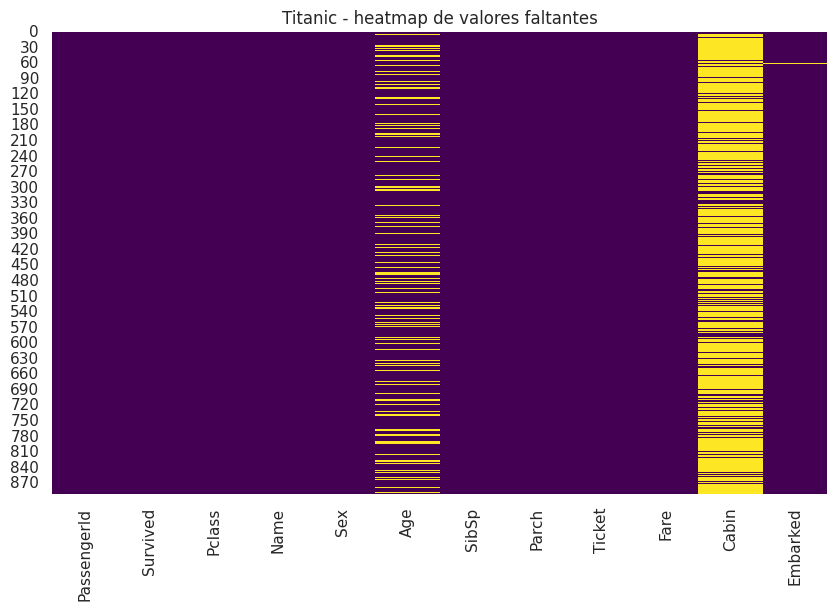

In [24]:
print('Titanic - Visualizacion de valores faltantes como un heatmap: ')
plt.figure(figsize=(10,6))
sns.heatmap(df_titanic.isna(), cbar=False, cmap='viridis')
plt.title('Titanic - heatmap de valores faltantes')
plt.show()

In [25]:
# Resumen estadistico de columnas numericas
print("Resumen estadistico de columnas numericas en titanic.csv")
df_titanic.describe()

Resumen estadistico de columnas numericas en titanic.csv


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


La desviación estándar (std) de la columna "Fare" indica la dispersión de los valores de tarifa en el conjunto de datos. En otras palabras, mide cuánto varían los valores de tarifa con respecto a la media. Una desviación estándar más alta indica una mayor variabilidad en los precios de las tarifas, mientras que una desviación estándar más baja indica una menor variabilidad.

In [26]:
# Resumen estadistico de columnas no numericas
print("Resumen estadistico de columnas no numericas en titanic.csv")
df_titanic.describe(include=['object'])

Resumen estadistico de columnas no numericas en titanic.csv


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


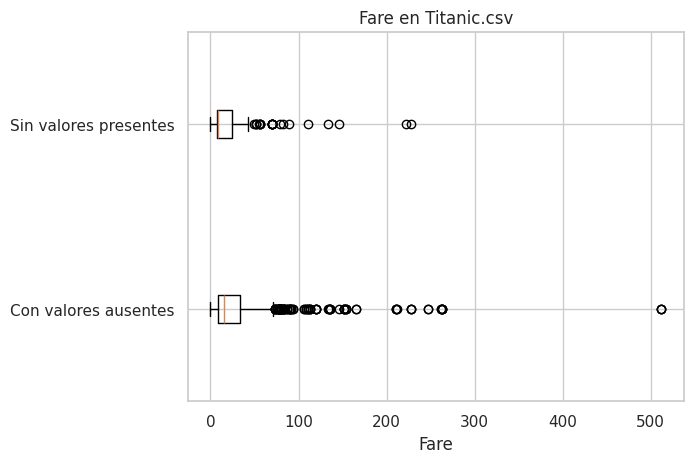

In [38]:
BM_MV = df_titanic.Age.isna()
MV_labels = ['Con valores ausentes', 'Sin valores presentes']
box_sr = pd.Series('', index= BM_MV.unique())

for poss in BM_MV.unique():
    BM = BM_MV == poss
    box_sr[poss] = df_titanic[BM].Fare

plt.boxplot(box_sr, vert=False)
plt.yticks([1, 2], MV_labels)
plt.xlabel('Fare')
plt.title('Fare en Titanic.csv')
plt.show()

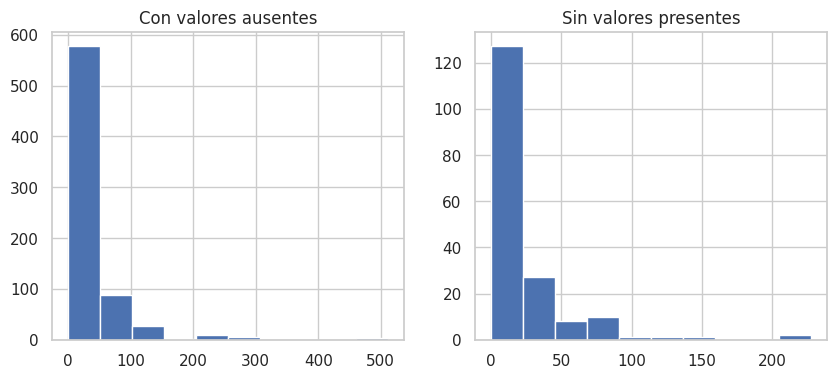

In [40]:
BM_MV = df_titanic.Age.isna()
fare_range = (df_titanic.Fare.min(), df_titanic.Fare.max())
MV_labels = ['Con valores ausentes', 'Sin valores presentes']
plt.figure(figsize=(10,4))

for i, poss in enumerate(BM_MV.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV == poss
    df_titanic[BM].Fare.hist()
    plt.title(MV_labels[i])
    plt.xlim = fare_range

plt.show()

In [44]:
from scipy.stats import ttest_ind
BM_MV = df_titanic.Age.isna()
ttest_ind(df_titanic[BM_MV].Fare, df_titanic[~BM_MV].Fare)

TtestResult(statistic=np.float64(-3.0180365502033966), pvalue=np.float64(0.002616756065905452), df=np.float64(889.0))

In [46]:
ttest_ind(df_titanic[BM_MV].Fare, df_titanic[~BM_MV].Fare).pvalue

np.float64(0.002616756065905452)

In [48]:
from scipy.stats import chi2_contingency
BM_MV = df_titanic.Age.isna()
contengency_table = pd.crosstab(BM_MV, df_titanic.Pclass)
contengency_table

Pclass,1,2,3
Age,,,
False,186,173,355
True,30,11,136


In [49]:
chi2_contingency(contengency_table)

Chi2ContingencyResult(statistic=np.float64(46.06266379338537), pvalue=np.float64(9.945340263413207e-11), dof=2, expected_freq=array([[173.09090909, 147.44781145, 393.46127946],
       [ 42.90909091,  36.55218855,  97.53872054]]))

# Lidiar con los valores perdidos

Como se muestra en la siguiente lista, existen cuatro enfoques diferentes para tratar los va faltantes:

* Manténgalos como están.

* limine los objetos de datos (filas) con valores faltantes.

* Elimine los atributos (columnas) con valores faltantes.

* Estimar e imputar un valor.

Cada una de las estrategias anteriores podría ser la mejor estrategia en diferentes circunsta De todos modos, cuando tratamos con valores faltantes, tenemos los dos objetivos siguiente

* Mantener tantos datos e información como sea posible

* Introducir la menor cantidad posible de sesgo en nuestro análisis.

<Axes: xlabel='Pclass'>

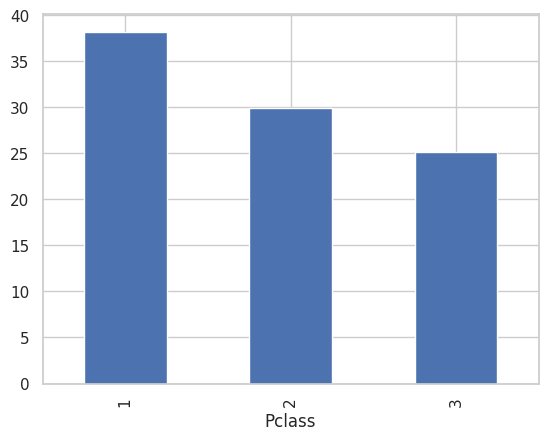

In [51]:
df_titanic.groupby('Pclass').Age.mean().plot.bar()

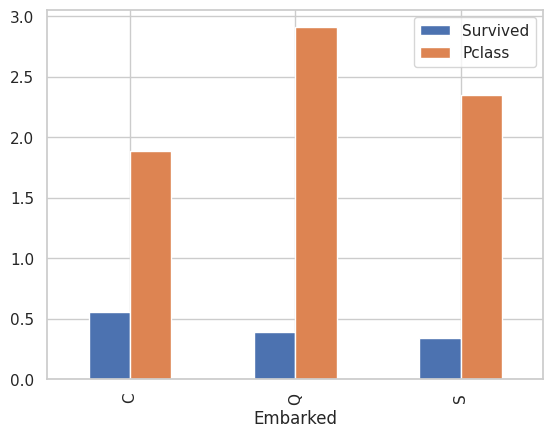

In [59]:
# como seria el corregido
df_titanic.groupby('Embarked')[['Survived', 'Pclass']].mean().plot.bar()
plt.show()